In [ ]:
# Cargar archivos de Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Almacenamos la ruta de los archivos en una variable
ruta='/content/drive/MyDrive/Colab Notebooks/ITESO/Ingeniería de características/P2022_MCD3735A/Módulo 1 - Extracción de datos de diferentes fuentes/'

# Archivos de texto
### De texto a `DataFrame`

In [2]:
import pandas as pd

In [ ]:
# Extracción a partir de texto separado por tabular
pd.read_fwf(ruta+'texto_2.txt',header=None)

,0,1,2
0,Ana,1.0,10
1,Beto,1.1,10
2,Alfredo,6.0,9
3,Armando,5.0,9


In [ ]:
pd.read_table(ruta+'texto_2.txt',header=None)

,0,1,2
0,Ana,1.0,10
1,Beto,1.1,10
2,Alfredo,6.0,9
3,Armando,5.0,9


In [ ]:
# Extracción a partir de texto separado por comas
pd.read_table(ruta+'texto_1.txt',sep=' ',header=None)

,0,1,2
0,"Ana,","1,",10
1,"Beto,","1.1,",10
2,"Alfredo,","6,",9
3,"Armando,","5,",9


In [ ]:
df=pd.read_table(ruta+'texto_1.txt',sep=',',header=None)
df

,0,1,2
0,Ana,1.0,10
1,Beto,1.1,10
2,Alfredo,6.0,9
3,Armando,5.0,9


In [ ]:
df.loc[0,0]

'Ana'

In [ ]:
pd.read_csv(ruta+'texto_1.txt',header=None)

,0,1,2
0,Ana,1.0,10
1,Beto,1.1,10
2,Alfredo,6.0,9
3,Armando,5.0,9


### Expresiones regulares

In [ ]:
# Conversión de archivo a variable
file=open(ruta+'texto_3.txt')
texto=file.read()
file.close()
texto

'En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que vivía un hidalgo de los de lanza en astillero, adarga antigua, rocón flaco y galgo corredor. Una olla de algo más vaca que carnero, salpicón las más noches, duelos y quebrantos los sábados, lantejas los viernes, algún palomino de añadidura los domingos, consumían las tres partes de su hacienda. El resto della concluían sayo de velarte, calzas de velludo para las fiestas, con sus pantuflos de lo mesmo, y los días de entresemana se honraba con su vellorí de lo más fino. Tenía en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que así ensillaba el rocín como tomaba la podadera. Frisaba la edad de nuestro hidalgo con los cincuenta años; era de complexión recia, seco de carnes, enjuto de rostro, gran madrugador y amigo de la caza. Quieren decir que tenía el sobrenombre de Quijada, o Quesada, que en esto hay alguna diferencia en los autores 

In [ ]:
# Si ocurre un erro durante la ejecución, la variable file se cierra siempre
with open(ruta+'texto_3.txt') as file:
  texto=file.read()

texto

'En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que vivía un hidalgo de los de lanza en astillero, adarga antigua, rocón flaco y galgo corredor. Una olla de algo más vaca que carnero, salpicón las más noches, duelos y quebrantos los sábados, lantejas los viernes, algún palomino de añadidura los domingos, consumían las tres partes de su hacienda. El resto della concluían sayo de velarte, calzas de velludo para las fiestas, con sus pantuflos de lo mesmo, y los días de entresemana se honraba con su vellorí de lo más fino. Tenía en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que así ensillaba el rocín como tomaba la podadera. Frisaba la edad de nuestro hidalgo con los cincuenta años; era de complexión recia, seco de carnes, enjuto de rostro, gran madrugador y amigo de la caza. Quieren decir que tenía el sobrenombre de Quijada, o Quesada, que en esto hay alguna diferencia en los autores 

In [ ]:
# Separamos las palabras de 'texto'
texto.split()

In [ ]:
# Ayuda del método
texto.split?

In [ ]:
# Conteo de palabras. Expresiones regulares
import re

In [ ]:
re.split?

In [ ]:
# \W -> ,.;*
# \w -> [A-Z][a-z][0-9]
# \d

L=re.split('\W',texto)
L

In [ ]:
# Convertimos la lista 'L' a set

S=set(L)
S

In [ ]:
S.discard('')

In [ ]:
S

In [ ]:
# Paréntesis
re.findall('[e,E]n',texto) # Entonces medimos la longitud de la lista
# Fin

In [ ]:
# Buscamos las palabras no repetidas (de 'S') en la variable 'texto' para poderlas contar
Lp=[]
Ln=[]
for palabra in S:
  Lp.append(palabra)
  Ln.append(len(re.findall(palabra,texto,flags=re.I))) # re.I=Ignorecase

DF=pd.DataFrame(columns=['Palabra','No. de coincidencias'])
DF['Palabra']=Lp
DF['No. de coincidencias']=Ln
DF.head()

,Palabra,No. de coincidencias
0,ensillaba,1
1,flaco,1
2,lanza,1
3,alguna,1
4,de,27


In [ ]:
DF.shape

(141, 2)

# Archivos excel

In [ ]:
# A partir de la función
pd.read_excel(ruta+'API_SI.POV.DDAY_DS2_en_excel_v2_1930012.xls')

In [ ]:
# Importamos la clase ExcelFile
from pandas import ExcelFile

In [ ]:
# A partir de la clase
obj=ExcelFile(ruta+'API_SI.POV.DDAY_DS2_en_excel_v2_1930012.xls')
obj.parse()

# Archivos JSON

Extracción de datos a partir de la siguiente liga https://www.sba.gov/sites/default/files/data.json

In [ ]:
pd.read_json('https://www.sba.gov/sites/default/files/data.json')['dataset']

0       {'@type': 'dcat:Dataset', 'title': 'SBA IT Pol...
1       {'@type': 'dcat:Dataset', 'title': 'Bureau IT ...
2       {'@type': 'dcat:Dataset', 'title': 'CIO Govern...
3       {'@type': 'dcat:Dataset', 'title': 'ExtractOri...
4       {'@type': 'dcat:Dataset', 'title': 'ExtractSer...
                              ...                        
1206    {'@type': 'dcat:Dataset', 'title': 'Small Busi...
1207    {'@type': 'dcat:Dataset', 'title': 'Small Busi...
1208    {'@type': 'dcat:Dataset', 'title': 'Small Busi...
1209    {'@type': 'dcat:Dataset', 'title': 'State Lice...
1210    {'@type': 'dcat:Dataset', 'title': 'The Develo...
Name: dataset, Length: 1211, dtype: object

# Archivos XML

In [3]:
import xml.etree.ElementTree as ET

In [4]:
archivo=ET.parse(ruta+'tabla_1.xml')
raiz=archivo.getroot()

In [ ]:
for nodo in raiz:
  print(nodo.tag,nodo.attrib)
  for subn in nodo:
    print(subn.tag,subn.text)

country {'name': 'Liechtenstein'}
rank 1
year 2008
gdppc 141100
country {'name': 'Singapore'}
rank 4
year 2011
gdppc 59900
country {'name': 'Panama'}
rank 68
year 2011
gdppc 13600


In [ ]:
d={}
for nodo in raiz:
  #print(nodo.tag,nodo.attrib)
  d[nodo.tag]=[]
  for subn in nodo:
    #print(subn.tag,subn.text)
    d[subn.tag]=[]
d

{'country': [], 'gdppc': [], 'rank': [], 'year': []}

In [ ]:
for nodo in raiz:
  #print(nodo.tag,nodo.attrib)
  d[nodo.tag].append(nodo.attrib['name'])
  for subn in nodo:
    #print(subn.tag,subn.text)
    d[subn.tag].append(subn.text)
d

{'country': ['Liechtenstein', 'Singapore', 'Panama'],
 'gdppc': ['141100', '59900', '13600'],
 'rank': ['1', '4', '68'],
 'year': ['2008', '2011', '2011']}

In [ ]:
# DataFrame
pd.DataFrame(d)

,country,rank,year,gdppc
0,Liechtenstein,1,2008,141100
1,Singapore,4,2011,59900
2,Panama,68,2011,13600


In [5]:
archivo2=ET.parse(ruta+'tabla_2.xml')
raiz=archivo2.getroot()

for nodo in raiz:
  print(nodo.tag,nodo.attrib,nodo.text)
  for subn in nodo:
    print(subn.tag,subn.attrib,subn.text)

documents {'count': 'N'} 
        
document {'KEY': 'e95a9a6c790ecb95e46cf15bee517651', 'web': 'www.ubm/doc004.com'} Nevertheless, high and based on experience, fluctuating throughput levels contradict high reliability.

        
document {'KEY': 'bc360cfbafc39970587547215162f0db', 'web': 'www.ubm/doc006.com'} As long as the production is not conducted on the basis of concrete customer orders, the companies objectives

        
document {'KEY': '19e71144c50a8b9160b3f0955e906fce', 'web': 'www.ubm/doc005.com'} Many companies today, in different fields of operations and sizes, have access to a vast amount of data which was not available only a couple of years ago.

        
document {'KEY': '21d4af9021a174f61b884606c74d9e42', 'web': 'www.ubm/doc002.com'} A famous example of a successful prediction is by the German astronomer Johann Gottfried Galle

        
document {'KEY': '28a45eb2460899763d709ca00ddbb665', 'web': 'www.ubm/doc001.com'} A more recent example of the same kind is the predi

In [6]:
# Selección de columnas
d={}
for nodo in raiz:
  for subn in nodo:
    d[subn.tag]=[]
    for k in subn.attrib: # subn.attrib.keys()
      d[k]=[]
d

{'KEY': [], 'document': [], 'web': []}

In [7]:
# Obtención de datos
for nodo in raiz:
  for subn in nodo:
    d[subn.tag].append(subn.text)
    for k,v in subn.attrib.items():
      d[k].append(v)
d

{'KEY': ['e95a9a6c790ecb95e46cf15bee517651',
  'bc360cfbafc39970587547215162f0db',
  '19e71144c50a8b9160b3f0955e906fce',
  '21d4af9021a174f61b884606c74d9e42',
  '28a45eb2460899763d709ca00ddbb665'],
 'document': ['Nevertheless, high and based on experience, fluctuating throughput levels contradict high reliability.\n\n        ',
  'As long as the production is not conducted on the basis of concrete customer orders, the companies objectives\n\n        ',
  'Many companies today, in different fields of operations and sizes, have access to a vast amount of data which was not available only a couple of years ago.\n\n        ',
  'A famous example of a successful prediction is by the German astronomer Johann Gottfried Galle\n\n        ',
  'A more recent example of the same kind is the prediction of the Higgs boson by Francois Englert and Peter Higgs\n\n        '],
 'web': ['www.ubm/doc004.com',
  'www.ubm/doc006.com',
  'www.ubm/doc005.com',
  'www.ubm/doc002.com',
  'www.ubm/doc001.com']}

In [8]:
pd.DataFrame(d)

,document,KEY,web
0,"Nevertheless, high and based on experience, fl...",e95a9a6c790ecb95e46cf15bee517651,www.ubm/doc004.com
1,As long as the production is not conducted on ...,bc360cfbafc39970587547215162f0db,www.ubm/doc006.com
2,"Many companies today, in different fields of o...",19e71144c50a8b9160b3f0955e906fce,www.ubm/doc005.com
3,A famous example of a successful prediction is...,21d4af9021a174f61b884606c74d9e42,www.ubm/doc002.com
4,A more recent example of the same kind is the ...,28a45eb2460899763d709ca00ddbb665,www.ubm/doc001.com


---

In [ ]:
archivo='IFC-Subscriptions-and-Voting-Power-of-Member-Count.xml'
file=ET.parse(ruta+archivo)
root=file.getroot()

for node in root:
  print(node.tag,node.attrib,node.text) # Esta información no es de interés
  for subn in node:
    print(subn.tag,subn.attrib,subn.text) # Usamos solo subn.attrib
    

---

# Archivos SHP

In [ ]:
# %conda !pip !conda
%pip install geopandas

In [12]:
import geopandas as gpd

In [13]:
rutaCOVID='/content/drive/MyDrive/Colab Notebooks/ITESO/Ingeniería de características/P2022_MCD3735A/Módulo 1 - Extracción de datos de diferentes fuentes/COVID_INDIA_POC-shp/'
gpd.read_file(rutaCOVID+'COVID_INDIA_POC.shp')

,OBJECTID,RecordID2,Address,State_UT,District,GC_LAT,GC_LON,geometry
0,1,163,"No. 09, Samiyam Road, Thafasenthirpuram, Aniks...",Tamil Nadu,CHENNAI,11.312304,79.709747,POINT (79.70975 11.31230)
1,2,977,noor imaging center almedia bldg junction of s...,MAHARASHTRA,MUMBAI,19.144093,72.842525,POINT (72.84253 19.14409)
2,3,1143,"D/o Elumalai, Kila Street, Ariyalur, (Local Ad...",Tamil Nadu,Ariyalur,11.140059,79.078628,POINT (79.07863 11.14006)
3,4,965,"C-403, Padmraj Residency, Opp. Kedar Society, ...",Maharashtra,THANE,19.157694,73.077513,POINT (73.07751 19.15769)
4,5,318,B-993 FIRST FLOOR BACK SIDE NEAR NHPC CHOWK GR...,HARYANA,FARIDABAD,28.471226,77.288265,POINT (77.28827 28.47123)
...,...,...,...,...,...,...,...,...
507,508,1192,GAJULARAMARAM MEDCHAL,Telangana,MEDCHAL MALKAJGIRI,17.561118,78.492872,POINT (78.49287 17.56112)
508,509,1200,"SULTANPURA ,HYDERABAD",Telangana,HYDERABAD,17.375189,78.487542,POINT (78.48754 17.37519)
509,510,1202,"SULTHANPURA,HYDERABAD",Telangana,HYDERABAD,17.555122,78.308114,POINT (78.30811 17.55512)
510,511,1236,KISHAN BAGH HYDERABAD,TELANGANA,HYDERABAD,17.355327,78.443261,POINT (78.44326 17.35533)


# Archivos imágen

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
I=plt.imread(ruta+'imagen.bmp')
I.shape

(199, 309, 4)

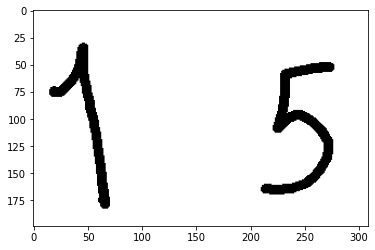

In [16]:
plt.imshow(I)

In [18]:
I[0,0,3] # Esto indica que la coordenada (0,0) es un color sólido

255

In [19]:
I[0,0,0]

255

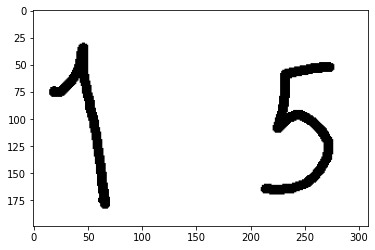

In [22]:
plt.imshow(I[:,:,0],cmap='gray')

In [21]:
plt.imshow?

In [24]:
G=(I[:,:,0]/3+I[:,:,1]/3+I[:,:,2]/3)/255
G[0,0]

1.0

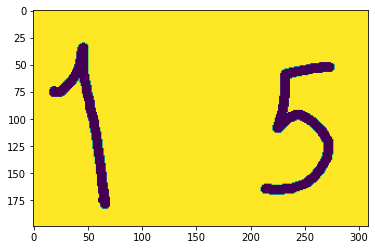

In [25]:
plt.imshow(G)